In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 한국어 폰트
from matplotlib import font_manager, rc
font_path = r""
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
# 분석 함수
def count_differences(dataset1, dataset2, difference):
    """
    두 데이터셋에서 특정한 차이를 가지는 원소 개수 세는 함수

    Args:
        dataset1: 데이터셋 1
        dataset2: 데이터셋 2
        difference: 원소간의 차이

    Returns:
        int: 특정 차이를 가지는 원소 개수의 셈
    """
    return sum(abs(data1 - data2) == difference for data1, data2 in zip(dataset1, dataset2))

def count_higher(dataset1, dataset2):
    """
    데이터셋 1의 원소가 데이터셋 2의 원소보다 큰 경우를 세는 함수

    Args:
        dataset1: 데이터셋 1
        dataset2: 데이터셋 2

    Returns:
        int: 데이터셋 1의 원소가 많은 경우의 셈
    """
    return sum(data1 > data2 for data1, data2 in zip(dataset1, dataset2))

def count_higher_by_difference(dataset1, dataset2, difference):
    """
    데이터셋 1 의 원소 + 차이가 데이터 셋 2 의 원소와 같은 경우를 세는 함수(차이 분포 보기 위한 함수)

    Args:
        dataset1: 데이터셋 1
        dataset2: 데이터셋 2
        difference: 원소간의 차이

    Returns:
        int: 데이터셋1 = 데이터셋2 + 차이 인 원소의 갯수의 셈
    """
    return sum(data1 == data2 + difference for data1, data2 in zip(dataset1, dataset2))


In [3]:
main_df = pd.read_excel(r"")
main_df.set_index('글 자료 ID', inplace=True)
print(main_df.columns)


Index(['C1', 'C1_responses_gpt3.5', 'C1_gpt3.5', 'C2', 'C2_responses_gpt3.5',
       'C2_gpt3.5', 'C3', 'C3_gpt3.5', 'C4', 'C4_responses_gpt3.5',
       'C4_gpt3.5', 'C5', 'C5_responses_gpt3.5', 'C5_gpt3.5', 'O1',
       'O1_responses_gpt3.5', 'O1_gpt3.5', 'O2', 'O2_responses_gpt3.5',
       'O2_gpt3.5', 'L1', 'L1_responses_gpt3.5', 'L1_gpt3.5', 'L2',
       'L2_responses_gpt3.5', 'L2_gpt3.5', 'C5_revised_responses_gpt3.5',
       'C5_revised_gpt3.5', 'Unnamed: 29', 'Unnamed: 30', 'L1_format',
       'L1_gpt3.5_format', 'L2_format', 'L2_gpt3.5_format', 'Unnamed: 35',
       'Unnamed: 36', 'C1_responses_gpt4', 'C1_gpt4', 'C2_responses_gpt4',
       'C2_gpt4', 'C2_forgpt4'],
      dtype='object')


C2_gpt4
정확도(Accuracy):  34.090909090909086 %
정확도(Accuracy) in range 1:  87.87878787878788 %
평균 제곱 오차(MSE): 1.1742424242424243 점
표준 편차: 1.0506841096425128 점


''

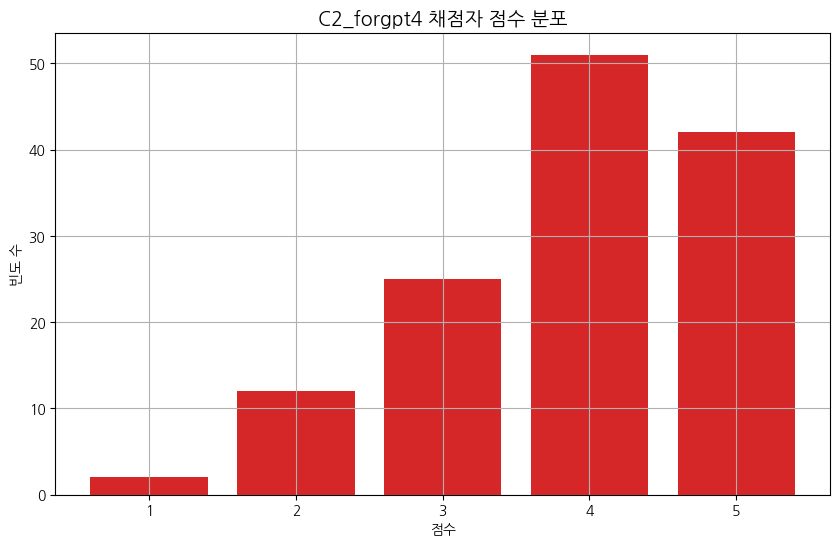

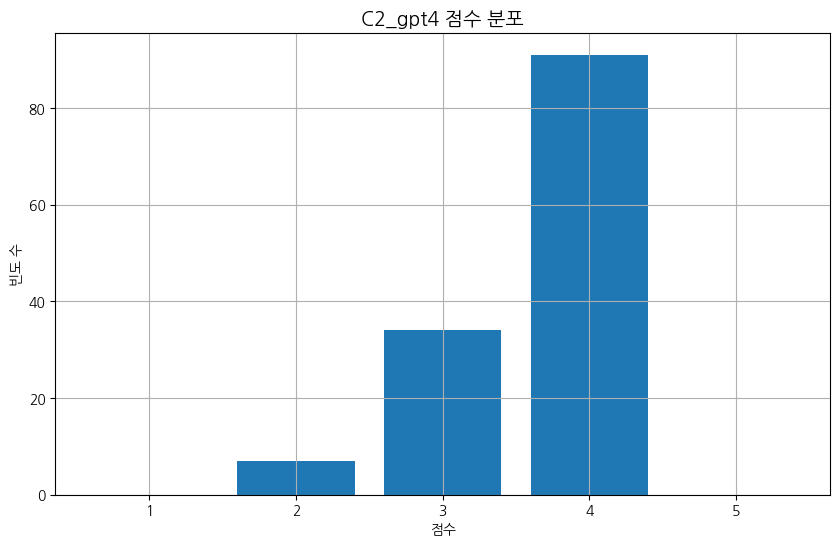

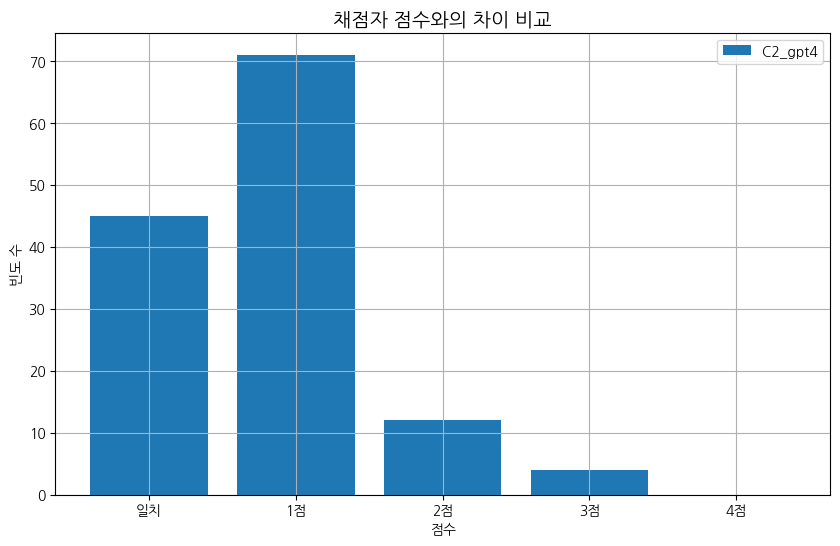

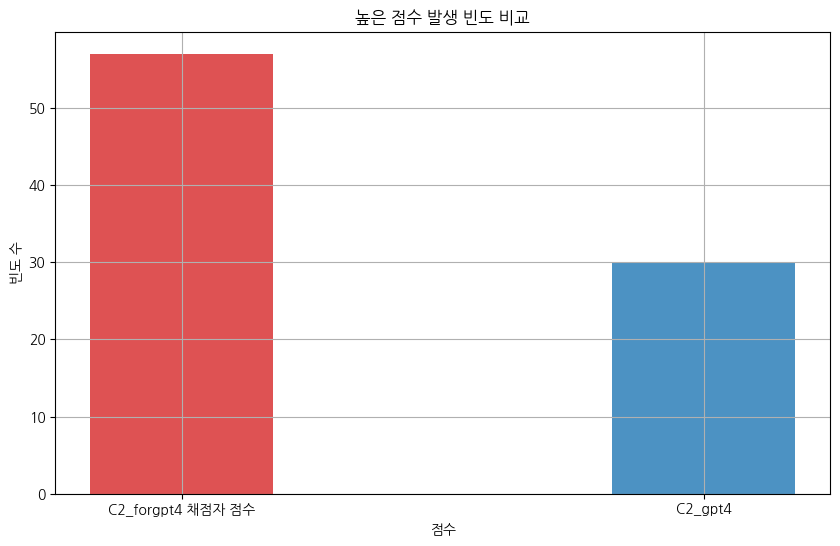

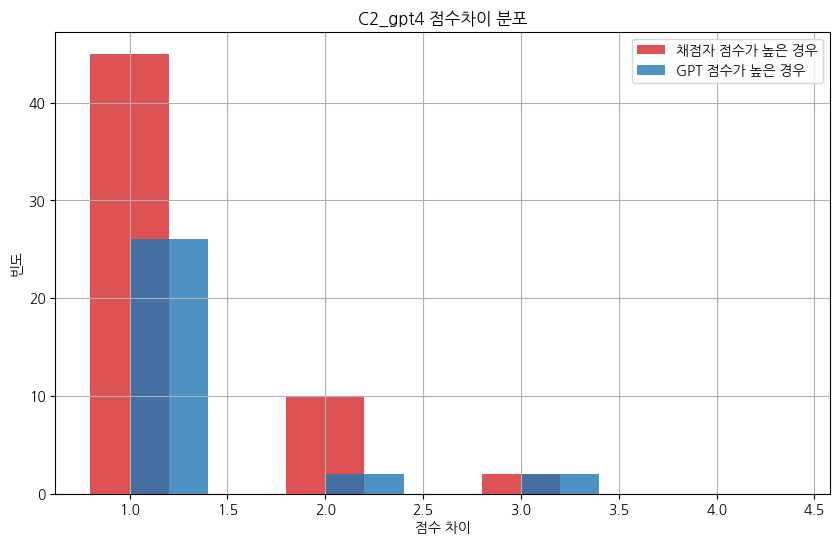

In [4]:
# 전체 비교 툴 
scores_human = main_df["C2_forgpt4"]
differences = [count_differences(scores_human, main_df['C2_gpt4'], i) for i in range(5)]
print("C2_gpt4")
print ("정확도(Accuracy): ",differences[0]/np.sum(differences)*100,"%")
print ("정확도(Accuracy) in range 1: ",(differences[0] + differences[1])/np.sum(differences)*100,"%")
# MSE 계산
mse = np.mean((main_df["C2_forgpt4"] - main_df['C2_gpt4']) ** 2)
standard_deviation = np.std((main_df["C2_forgpt4"] - main_df['C2_gpt4']))
print("평균 제곱 오차(MSE):", mse,"점")
print("표준 편차:",standard_deviation,"점")

# 채점자 / GPT 점수 분포 비교
x_4 = np.arange(1,6,1)
plt.figure(figsize = (10,6))
plt.bar(x_4,main_df["C2_forgpt4"].value_counts().sort_index(),color = 'tab:red')
plt.title("C2_forgpt4 채점자 점수 분포",fontsize = 14)
plt.xlabel("점수")
plt.ylabel("빈도 수")
plt.grid()

e_a_eng_C2_forgpt4_df = pd.DataFrame(index=x_4, columns=["count"])
counts = main_df['C2_gpt4'].value_counts().sort_index()
e_a_eng_C2_forgpt4_df["count"] = counts.reindex(x_4, fill_value=0)
plt.figure(figsize = (10,6))
plt.bar(x_4,e_a_eng_C2_forgpt4_df['count'])
plt.title('C2_gpt4 점수 분포',fontsize = 14)
plt.xlabel("점수")
plt.ylabel("빈도 수")
plt.grid()

# 점수 차이 분포
x1 = ['일치', '1점', '2점', '3점', '4점']
plt.figure(figsize=(10, 6))
plt.bar(x1, differences, label = 'C2_gpt4')
plt.title("채점자 점수와의 차이 비교", fontsize=14)
plt.xlabel("점수")
plt.ylabel("빈도 수")
plt.legend()
plt.grid()


# 높은빈도 차이
higher_count1 = count_higher(scores_human,main_df['C2_gpt4'])
higher_count2 = count_higher(main_df['C2_gpt4'],scores_human)

x2 = np.arange(2)  # x-axis values
width = 0.35  # Width of the bars
plt.figure(figsize= (10,6))
plt.bar(x2, [higher_count1, higher_count2], width, color=['tab:red', 'tab:blue'], alpha=0.8)
plt.title('높은 점수 발생 빈도 비교')
plt.xticks(x2, ['C2_forgpt4 채점자 점수', 'C2_gpt4'])
plt.xlabel("점수")
plt.ylabel("빈도 수")
plt.grid()

#점수차이 분포2
x3 = np.arange(1, 5)
higher_counts1 = [count_higher_by_difference(scores_human,main_df['C2_gpt4'], diff) for diff in x3]
higher_counts2 = [count_higher_by_difference(main_df['C2_gpt4'], scores_human, diff) for diff in x3]

plt.figure(figsize=(10, 6))
plt.bar(x3, higher_counts1, width=0.4, color='tab:red', alpha=0.8, label='채점자 점수가 높은 경우')
plt.bar(x3, higher_counts2, width=0.4, align='edge', color='tab:blue', alpha=0.8, label='GPT 점수가 높은 경우')
plt.title('C2_gpt4 점수차이 분포')
plt.xlabel('점수 차이')
plt.ylabel('빈도')
plt.legend()
plt.grid()
;